# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [8]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Center the training data.
    X_train_centered = X_train - np.mean(X_train, axis=0)

    # Step 2: Compute the covariance matrix.
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)

    # Step 3: Compute eigenvalues and eigenvectors of the covariance matrix.
    eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues and corresponding eigenvectors in descending order.
    sorted_indices = np.argsort(eig_values)[::-1]  # Sort in descending order
    eig_values = eig_values[sorted_indices]
    eig_vectors = eig_vectors[:, sorted_indices]

    # Step 5: Select the top 'n_components' eigenvectors.
    V = eig_vectors[:, :n_components]

    # Step 6: Project the training data onto the reduced-dimensional space.
    X_train_svd = np.dot(X_train_centered, V)

    # Center the test data using the training data mean.
    X_test_centered = X_test - np.mean(X_train, axis=0)

    # Project the test data onto the reduced-dimensional space.
    X_test_svd = np.dot(X_test_centered, V)

    return X_train_svd, X_test_svd, V

## Part 3: Train Logistic Regression and Measure Performance

In [9]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time

## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [10]:
svd_components = [10, 50, 100, 200, 300, 400, 500, 784]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, _ = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8035, Training time: 1.2388 seconds
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9080, Training time: 13.6858 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 44.2817 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 97.4889 seconds
Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9206, Training time: 162.6923 seconds
Applying custom SVD with 400 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 400, Accuracy: 0.9196, Training time: 282.6397 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 347.7263 seconds
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9207, Training time: 575.2738 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


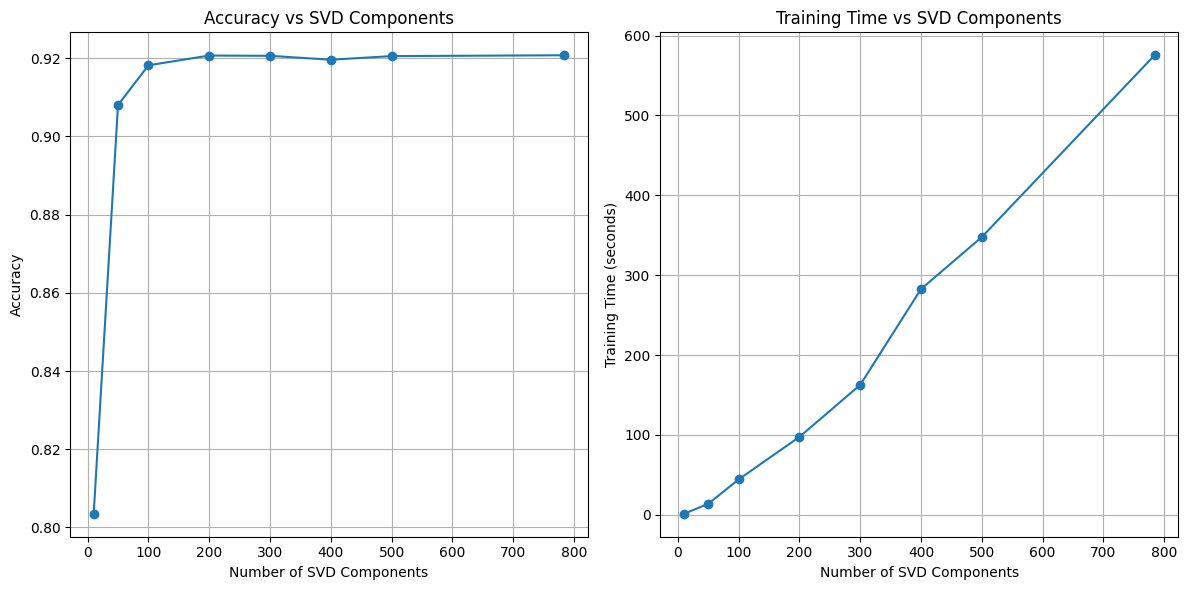

In [11]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

# Extract the values from the results for plotting
components = [result[0] for result in results]  # SVD components
accuracies = [result[1] for result in results]  # Accuracy for each SVD components
training_times = [result[2] for result in results]  # Training time for each SVD components

# Plot Accuracy vs SVD Components
plt.figure(figsize=(12, 6))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.title('Accuracy vs SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.grid(True)

# Plotting Training Time
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o')
plt.title('Training Time vs SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.grid(True)

plt.tight_layout()
plt.show()

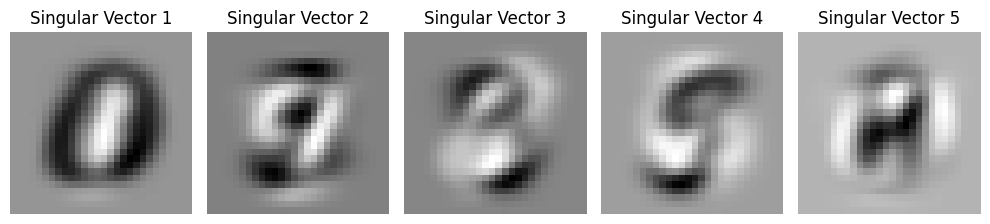

In [12]:
# Plot top 5 singular vectors
def visualize_top_singular_vectors(V, num_vectors=5):
    # Reshape each singular vector to 28x28 and visualize
    plt.figure(figsize=(10, 5))
    for i in range(num_vectors):
        plt.subplot(1, num_vectors, i+1)
        plt.imshow(V[:, i].reshape(28, 28), cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Apply SVD with a high number of components to visualize the singular vectors
_, _, V = apply_svd_custom(X_train, X_test, 784)

# Visualize the top 5 singular vectors
visualize_top_singular_vectors(V, num_vectors=5)

## Part 6: Analyze / Conclusion

YOUR ANSWER:

## **Impact on Model Accuracy:**

*   **Higher SVD components generally yield better accuracy**: This happens because each additional component brings in more information from the original dataset, which helps the model to better distinguish between different digit classes.

*   **Diminishing returns after a certain number of components**: After certain point, the added information captured by the extra components contains either redundant details or noise that does not meaningfully improve the model's classification ability.

*   **Lower components result in reduced accuracy:** When the number of SVD components is too small (e.g., around 50), there isn’t enough information to accurately classify the digits, leading to poorer performance.


## **Impact on Training Time:**

*   **Lower training time with fewer SVD components**: This makes sense because fewer features mean that logistic regression has fewer computations to perform during each iteration of the optimization process.

*   **Sharp increase in training time with more components:** This indicates that dimensionality reduction can lead to significant computational efficiency, especially when only a moderate number of components (e.g., 100-200) is sufficient to maintain strong model performance.


## **Optimal Number of SVD Components:**

*   **Balance between accuracy and efficiency:** From the plots, it’s clear that the best balance between accuracy and training time lies between 100 and 200 SVD components. These levels offer nearly optimal accuracy (around 0.92), while also significantly reducing training time compared to the full 784-component model. Beyond 200 components, the improvements in accuracy are minimal and do not justify the additional training time.

## **Singular Vectors Visualization:**

*   **Lower singular vectors may capture finer details or noise:** The first few singular vectors typically capture the most important directions of variance in the data, whereas subsequent singular vectors are less significant and might capture noise or less meaningful details. This explains why keeping only the first 100-200 components retains most of the useful information, and further increasing the number of components does not lead to major improvements in accuracy.